# Nonlinear Optimization Session 7

Implement the Lagrange-Newton algorithm. Use as input data the starting vectors $x_0$ and $\mu_0$, the parameter for the stopping criterion $\epsilon$, and the parameter for the maximal number of allowed iterations *kmax*. The sequence $x_0, \mu_0, x_1, \mu_1, x_2, \mu_2, \dots$ containing the iteration history and the number of performed iterations should be returned.

In [10]:
using LinearAlgebra, ForwardDiff, Plots

In [11]:
function lagrange_newton(f::Function, h::Function, x0::Vector{<:Float64}, μ0::Vector{<:Float64}, ϵ::Float64, kmax::Integer)
    @assert ϵ >= 0
    @assert kmax >= 0

    n = length(x0)
    p = length(μ0)

    ϕ(xμ) = [ForwardDiff.gradient(f, xμ[1:n]) + ForwardDiff.jacobian(h, xμ[1:n])' * xμ[n+1:n+p]; h(xμ[1:n])]

    history = [(x0, μ0)]
    xμ = [x0; μ0]

    for _ ∈ 1:kmax
        
        ϕ_val = ϕ(xμ)
        Δxμ = -(ForwardDiff.jacobian(ϕ, xμ) \ ϕ_val)
        xμ += Δxμ
        
        push!(history, (xμ[1:n], xμ[n+1:n+p]))
        
        if norm(ϕ_val) <= ϵ
            break
        end
        
    end
    
    return history
end;

The implemented algorithm should be tested for the following functions, starting values, and parameters:

(a) $f(x_1, x_2) = 2x_1^4 + 2x_2^4 + 4x_1^2 - x_1x_2 + 6x_2^2$, $h(x_1, x_2) = 2x_1 - x_2 + 4$ with $x_0 = (0, 0)^{\top}$, $\mu_0 = 0$, *kmax* $= 200$ and $\epsilon = 10^{−3}$.

In [12]:
f_a(x) = 2x[1]^4 + 2x[2]^4 + 4x[1]^2 - x[1]x[2] + 6x[2]^2
h_a(x) = [2x[1] - x[2] + 4]
ϕ_a(x, μ) = [ForwardDiff.gradient(f_a, x) + ForwardDiff.jacobian(h_a, x)' * μ; h_a(x)]
x0 = [0.0, 0.0]
μ0 = [0.0]
ϵ = 1e-3
kmax = 200
;

In [13]:
history = lagrange_newton(f_a, h_a, x0, μ0, ϵ, kmax)

6-element Vector{Tuple{Vector{Float64}, Vector{Float64}}}:
 ([0.0, 0.0], [0.0])
 ([-1.7692307692307692, 0.46153846153846156], [7.3076923076923075])
 ([-1.4796742952316329, 1.0406514095367343], [17.714690404900754])
 ([-1.514067740103492, 0.9718645197930158], [20.404438984160656])
 ([-1.5150228159286008, 0.9699543681427982], [20.454743792998677])
 ([-1.5150235096522362, 0.9699529806955273], [20.454781558294812])

In [14]:
x, μ = history[end]
@show f_a(x0)
@show f_a(x)
@show norm(ϕ_a(x, μ))
@show length(history)
;

f_a(x0) = 0.0
f_a(x) = 28.602551166696166


norm(ϕ_a(x, μ)) = 4.8103998383236805e-11
length(history) = 6


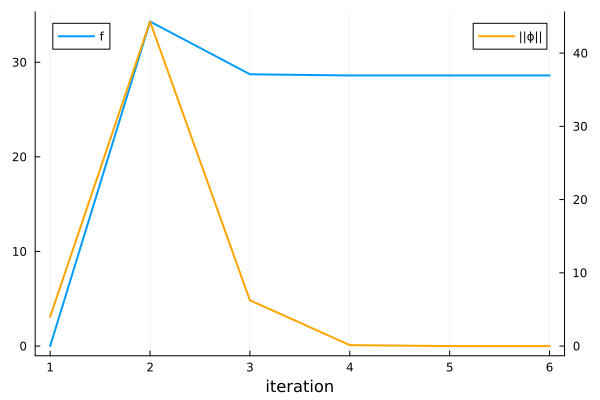

In [15]:
k = length(history)
xs = [history[i][1] for i in 1:k]
μs = [history[i][2] for i in 1:k]
plot(1:k, f_a.(xs), label="f", legend=:topleft, xlabel="iteration", linewidth=2)
plot!(twinx(), norm.(ϕ_a.(xs, μs)), label="||ϕ||", color=:orange, xticks=:none, linewidth=2)

(a) $f(x_1, x_2, x_3) = 1000 - x_1^2 - 2x_2^2 - x_3^2 - x_1x_2 - x_1x_3$, $h_1(x_1, x_2, x_3) = x_1^2 + x_2^2 + x_3^2 - 25$, $h_2(x_1, x_2, x_3) = 8x_1 + 14x_2 + 7x_3 - 56$ with $x_0 = (0, 0)^{\top}$, $\mu_0 = 0$, *kmax* $= 200$ and $\epsilon = 10^{−3}$.

In [16]:
f_b(x) = 1000 - x[1]^2 - 2x[2]^2 - x[3]^2 - x[1]x[2] - x[1]x[3]
h_b(x) = [x[1]^2 + x[2]^2 + x[3]^2 - 25, 8x[1] + 14x[2] + 7x[3] - 56]
ϕ_b(x, μ) = [ForwardDiff.gradient(f_b, x) + ForwardDiff.jacobian(h_b, x)' * μ; h_b(x)]
x0 = [3.0, 0.2, 3.0]
μ0 = [0.0, 0.0]
ϵ = 1e-5
kmax = 200
;

In [17]:
history = lagrange_newton(f_b, h_b, x0, μ0, ϵ, kmax)

6-element Vector{Tuple{Vector{Float64}, Vector{Float64}}}:
 ([3.0, 0.2, 3.0], [0.0, 0.0])
 ([3.633213579089869, 0.15912214932833496, 3.529511610954909], [1.4754113297927731, 0.2628241174632927])
 ([3.5311729185992826, 0.2145396397287729, 3.5352945278575607], [1.2278140479713109, 0.2739328193232829])
 ([3.512256346545299, 0.2169302365456244, 3.5521322737141237], [1.2234626247891383, 0.2749388867521788])
 ([3.5121213428829914, 0.21698793976043906, 3.5521711571842745], [1.2234635606052153, 0.2749371019469538])
 ([3.5121213418747192, 0.21698794151522302, 3.5521711548270174], [1.2234635604844077, 0.27493710206562977])

In [18]:
x, μ = history[end]
@show f_b(x0)
@show f_b(x)
@show norm(ϕ_b(x, μ))
@show length(history)
;

f_b(x0) = 972.3199999999999
f_b(x) = 961.7151721300521
norm(ϕ_b(x, μ)) = 0.0
length(history) = 6


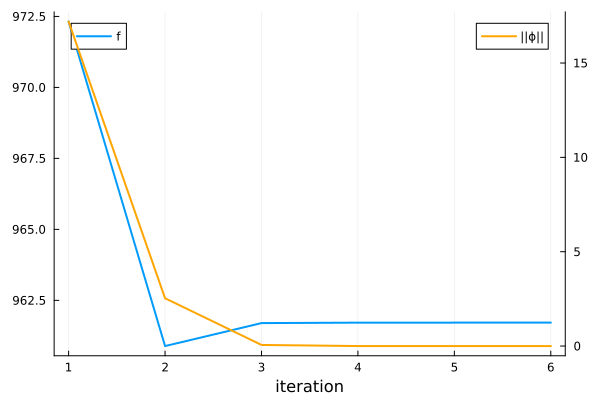

In [19]:
k = length(history)
xs = [history[i][1] for i in 1:k]
μs = [history[i][2] for i in 1:k]
plot(1:k, f_b.(xs), label="f", legend=:topleft, xlabel="iteration", linewidth=2)
plot!(twinx(), norm.(ϕ_b.(xs, μs)), label="||ϕ||", color=:orange, xticks=:none, linewidth=2)